In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  


In [2]:
#读取文件名作为标签值
def read_file(data_dir):
    ani_dir = data_dir + '/animal/'
    fru_dir = data_dir + '/fruit/'
    ani_names = tf.constant([ani_dir + fn for fn in os.listdir(ani_dir)])
    fru_names = tf.constant([fru_dir + fn for fn in os.listdir(fru_dir)])
    filenames = tf.concat([ani_names , fru_names] , axis = -1)
    
    labels = tf.concat([tf.zeros(ani_names.shape , dtype = tf.int32),
                        tf.ones(fru_names.shape , dtype = tf.int32)],
                       axis = -1)
    return filenames , labels

In [3]:
#读取图片，图片标准化
def resize_img(filename , label):
    img_str = tf.io.read_file(filename)
    img_decode = tf.image.decode_jpeg(img_str , channels = 3)
    img_resize = tf.image.resize(img_decode , [256 , 256])  / 255.0
    return img_resize , label

In [4]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


In [5]:
train_data_dir = 'D:/project/tr01'

In [6]:
def pre_data(data_dir):
    filenames , labels = read_file(train_data_dir)
    dataset = tf.data.Dataset.from_tensor_slices((filenames , labels))
    dataset = dataset.map(
                       map_func = resize_img ,
                       num_parallel_calls = tf.data.experimental.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

    return dataset

In [7]:

#乱序
buffer_size = 1500
batch_size = 64

In [8]:
train_data = pre_data(train_data_dir)
it = iter(train_data)
images , labels = next(it)
print(images.shape)
print(labels.shape)
print(train_data)

(64, 256, 256, 3)
(64,)
<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>


In [9]:

#建立空框架
model = tf.keras.models.Sequential()

#第一卷积层
model.add(tf.keras.layers.Conv2D(filters = 32 ,
                                 kernel_size = (3 , 3) ,
                                 input_shape = (256 , 256 , 3) ,
                                 activation = 'relu' , 
                                 padding = 'same'))

#防止过拟合，抛弃掉一些特征数据
model.add(tf.keras.layers.Dropout(rate = 0.3))

#第一个池化层
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2 , 2)))

#第二个卷积层
model.add(tf.keras.layers.Conv2D(filters =64 ,
                                 kernel_size  = (3 , 3) ,
                                 activation = 'relu' ,
                                 padding = 'same'))

#防止过拟合
model.add(tf.keras.layers.Dropout(rate = 0.3))

#第二个池化层
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2 , 2)))

#平坦层
model.add(tf.keras.layers.Flatten())

#全连接层
model.add(tf.keras.layers.Dense(128 , activation = 'sigmoid'))

#输出层
model.add(tf.keras.layers.Dense(10 , activation = 'sigmoid'))


# In[14]:


model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
dropout (Dropout)            (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0

In [10]:
train_epochs = 100


In [11]:
model.compile(optimizer = 'adam' ,
              loss = 'sparse_categorical_crossentropy' ,
              metrics = ['accuracy'])

In [12]:
train_history = model.fit(images , labels ,
                          validation_split = 0.2 ,
                          epochs = train_epochs ,
                          batch_size = batch_size ,
                          verbose = 2)

Train on 51 samples, validate on 13 samples
Epoch 1/100
51/51 - 4s - loss: 2.2881 - accuracy: 0.1176 - val_loss: 1.6666 - val_accuracy: 0.9231
Epoch 2/100
51/51 - 1s - loss: 1.6719 - accuracy: 0.8824 - val_loss: 1.6404 - val_accuracy: 0.9231
Epoch 3/100
51/51 - 1s - loss: 1.6461 - accuracy: 0.8824 - val_loss: 1.6119 - val_accuracy: 0.9231
Epoch 4/100
51/51 - 1s - loss: 1.6175 - accuracy: 0.8824 - val_loss: 1.5921 - val_accuracy: 0.9231
Epoch 5/100
51/51 - 1s - loss: 1.5980 - accuracy: 0.8824 - val_loss: 1.5721 - val_accuracy: 0.9231
Epoch 6/100
51/51 - 1s - loss: 1.5783 - accuracy: 0.8824 - val_loss: 1.5518 - val_accuracy: 0.9231
Epoch 7/100
51/51 - 1s - loss: 1.5584 - accuracy: 0.8824 - val_loss: 1.5312 - val_accuracy: 0.9231
Epoch 8/100
51/51 - 1s - loss: 1.5382 - accuracy: 0.8824 - val_loss: 1.5103 - val_accuracy: 0.9231
Epoch 9/100
51/51 - 1s - loss: 1.5177 - accuracy: 0.8824 - val_loss: 1.4892 - val_accuracy: 0.9231
Epoch 10/100
51/51 - 1s - loss: 1.4971 - accuracy: 0.8824 - val_l

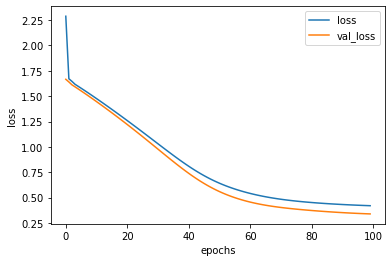

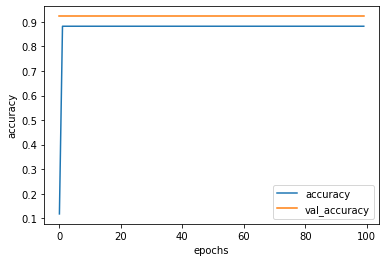

In [13]:
plot_graphs(train_history, 'loss')
plot_graphs(train_history, 'accuracy')

In [14]:
test_loss , test_acc = model.evaluate(train_data , verbose = 2)

24/24 - 7s - loss: 0.4494 - accuracy: 0.8666


In [16]:
preds = model.predict_classes(images)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [21]:
tf.keras.models.save_model(
    model, "D:\project", overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None
)


INFO:tensorflow:Assets written to: D:\project\assets
